In [5]:
# ==============================================================================
# FASE 1: ANÁLISE EXPLORATÓRIA DE DADOS (EDA) - DOENÇA CARDÍACA
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. Importação das Bibliotecas
# ------------------------------------------------------------------------------
# Importação das bibliotecas essenciais para manipulação de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("### Bibliotecas importadas com sucesso! ###\n")

### Bibliotecas importadas com sucesso! ###



In [6]:
# ------------------------------------------------------------------------------
# 2. Carregamento e Limpeza Inicial dos Dados
# ------------------------------------------------------------------------------
# Carregar o dataset a partir do arquivo CSV
df_heart = pd.read_csv('heart.csv')

# CORREÇÃO: Remove espaços em branco do início e do fim dos nomes das colunas
# Isso evita o 'KeyError' que ocorreu anteriormente.
df_heart.columns = df_heart.columns.str.strip()

print("### Dataset carregado e nomes das colunas limpos com sucesso! ###\n")
print("Visualização das 5 primeiras linhas do dataset:")
print(df_heart.head())
print("\n")

### Dataset carregado e nomes das colunas limpos com sucesso! ###

Visualização das 5 primeiras linhas do dataset:
   Age   Sex   ChestPainType  RestingBP  Cholesterol  FastingBS   RestingECG  \
0   40   M     ATA                  140          289          0   Normal       
1   49   F     NAP                  160          180          0   Normal       
2   37   M     ATA                  130          283          0   ST           
3   48   F     ASY                  138          214          0   Normal       
4   54   M     NAP                  150          195          0   Normal       

   MaxHR   ExerciseAngina  Oldpeak   ST_Slope  HeartDisease  
0    172   N                   0.0   Up                   0  
1    156   N                   1.0   Flat                 1  
2     98   N                   0.0   Up                   0  
3    108   Y                   1.5   Flat                 1  
4    122   N                   0.0   Up                   0  




In [7]:
# ------------------------------------------------------------------------------
# 3. Análise Inicial da Estrutura
# ------------------------------------------------------------------------------
print("### 3. Análise Inicial da Estrutura ###\n")
# Exibir o número de linhas e colunas
print(f"O dataset possui {df_heart.shape[0]} linhas e {df_heart.shape[1]} colunas.")

# Exibir informações gerais sobre o dataset (tipos de dados, valores não nulos)
print("\nInformações gerais do DataFrame:")
df_heart.info()
print("\n")

### 3. Análise Inicial da Estrutura ###

O dataset possui 918 linhas e 12 colunas.

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB




In [8]:
# 4. Análise de Qualidade dos Dados
# ------------------------------------------------------------------------------
print("### 4. Análise de Qualidade dos Dados ###\n")
# Verificar a presença de valores '0' em colunas médicas onde isso seria incomum
print("Contagem de valores '0' em colunas onde não são esperados:")
print(f"RestingBP (Pressão Arterial em Repouso): {df_heart[df_heart['RestingBP'] == 0].shape[0]}")
print(f"Cholesterol: {df_heart[df_heart['Cholesterol'] == 0].shape[0]}")
print("OBS: 172 valores de colesterol zerados foram encontrados. Eles devem ser tratados como dados ausentes na fase de pré-processamento.\n")

### 4. Análise de Qualidade dos Dados ###

Contagem de valores '0' em colunas onde não são esperados:
RestingBP (Pressão Arterial em Repouso): 1
Cholesterol: 172
OBS: 172 valores de colesterol zerados foram encontrados. Eles devem ser tratados como dados ausentes na fase de pré-processamento.



### 5. Análise Descritiva e Visualização ###

--- 5.1 Features Numéricas ---

Estatísticas Descritivas - Features Numéricas:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%   

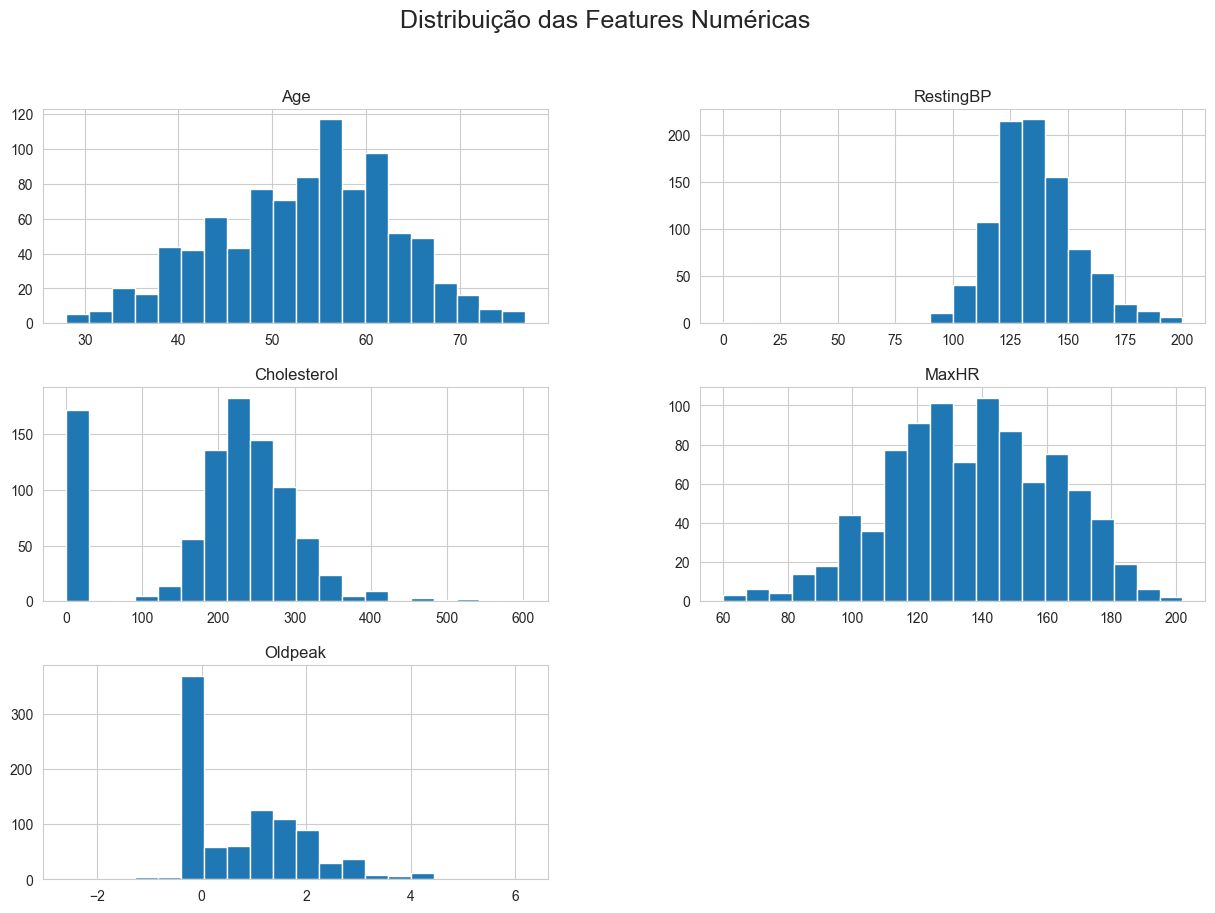

In [9]:
# ------------------------------------------------------------------------------
# 5. Análise Descritiva e Visualização
# ------------------------------------------------------------------------------
print("### 5. Análise Descritiva e Visualização ###\n")

# 5.1. Features Numéricas
print("--- 5.1 Features Numéricas ---\n")
print("Estatísticas Descritivas - Features Numéricas:")
print(df_heart.describe())

# Plotar histogramas para visualizar a distribuição das features numéricas
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_heart[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribuição das Features Numéricas", size=18)
print("\nExibindo gráfico de distribuição das features numéricas...")
plt.show()



--- 5.2 Features Categóricas ---

Exibindo gráfico de distribuição das features categóricas...


/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/1446677011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_heart, ax=axes[i], palette='viridis')
/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/1446677011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_heart, ax=axes[i], palette='viridis')
/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/1446677011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_heart, ax=axes[i], palette='virid

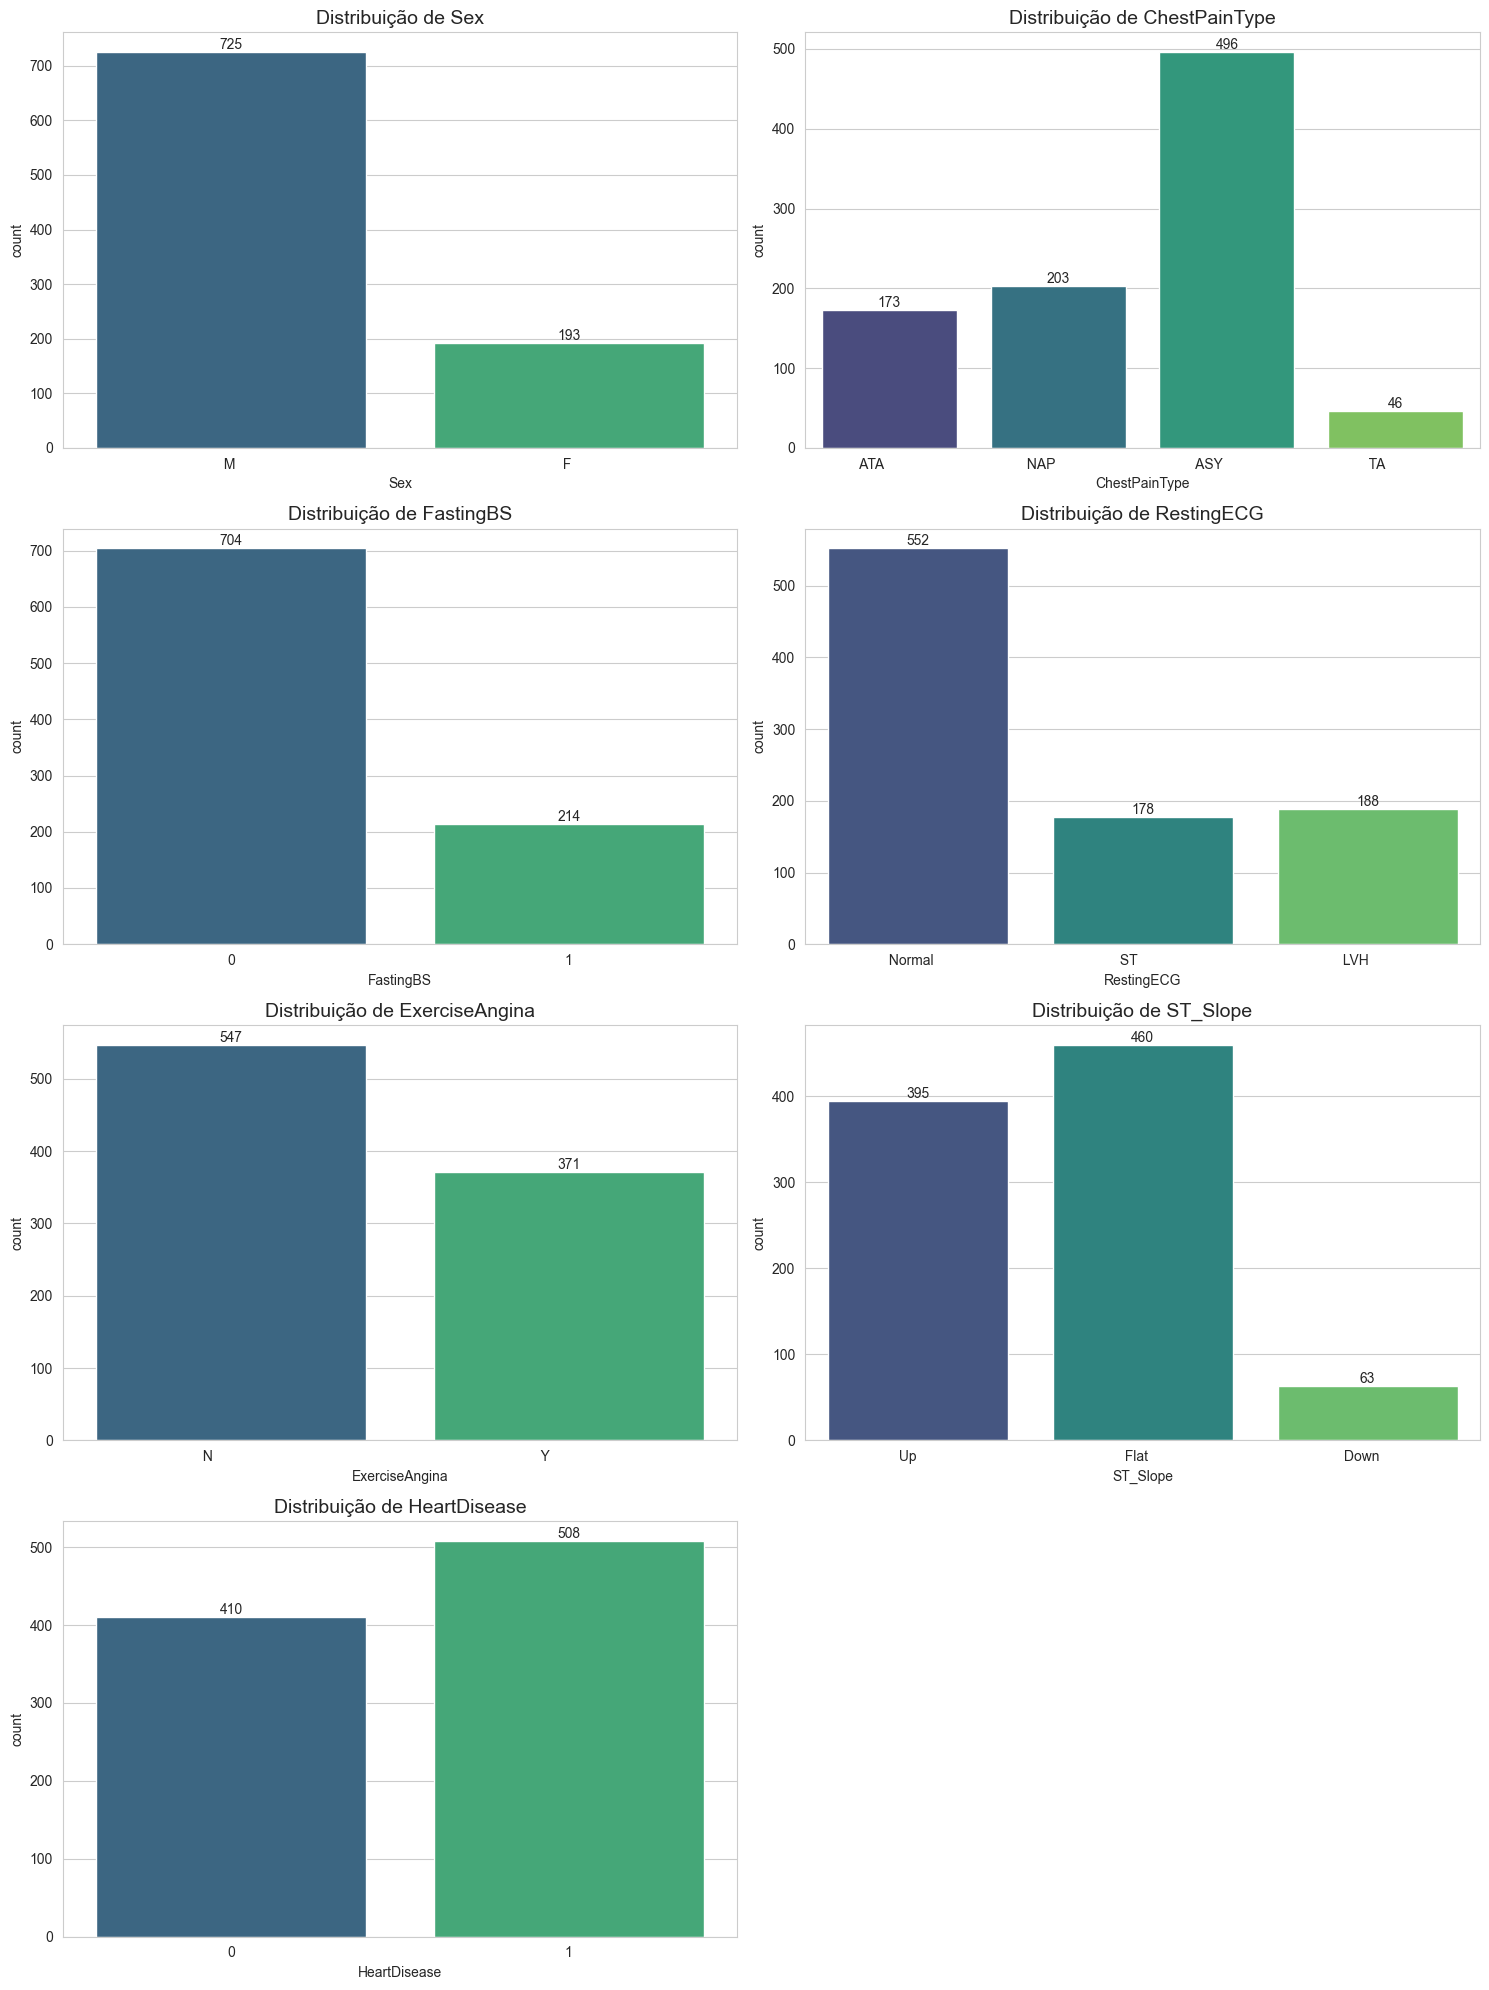

In [10]:
# 5.2. Features Categóricas
print("\n--- 5.2 Features Categóricas ---\n")
# Listar as features categóricas (incluindo a variável alvo)
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Plotar gráficos de barras para cada feature categórica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df_heart, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Distribuição de {col}", fontsize=14)
    # Adicionar contagem no topo das barras
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Remover o último subplot vazio, se houver
if len(categorical_features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
print("Exibindo gráfico de distribuição das features categóricas...")
plt.show()




--- Análise: Features Categóricas vs. HeartDisease ---



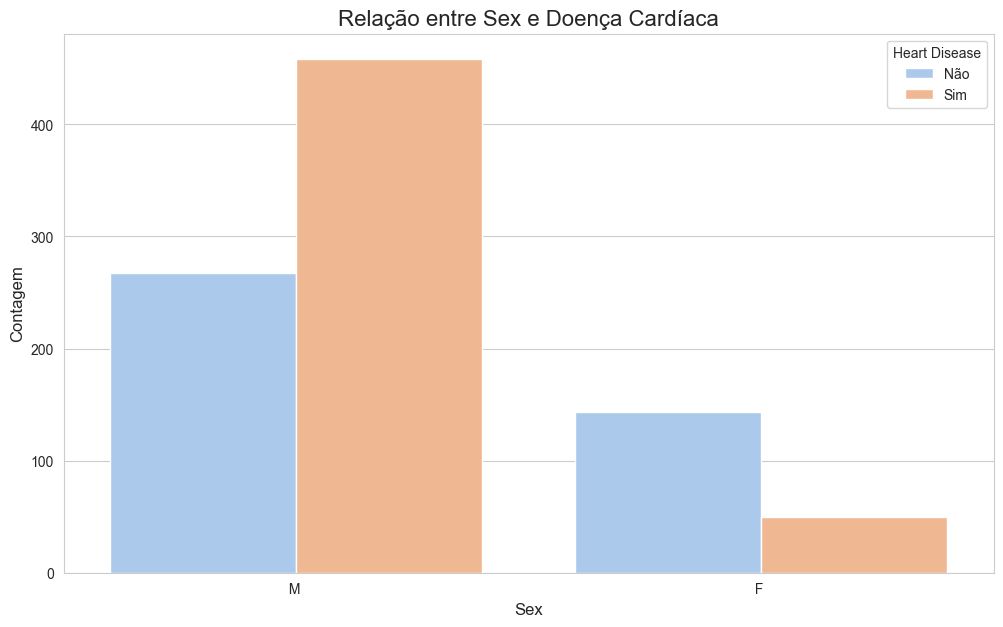

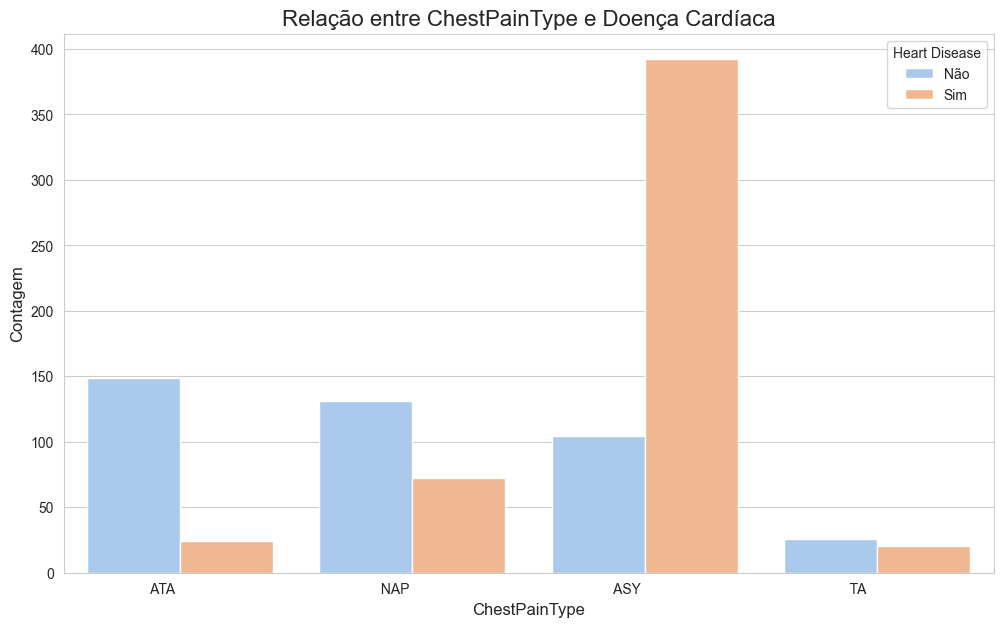

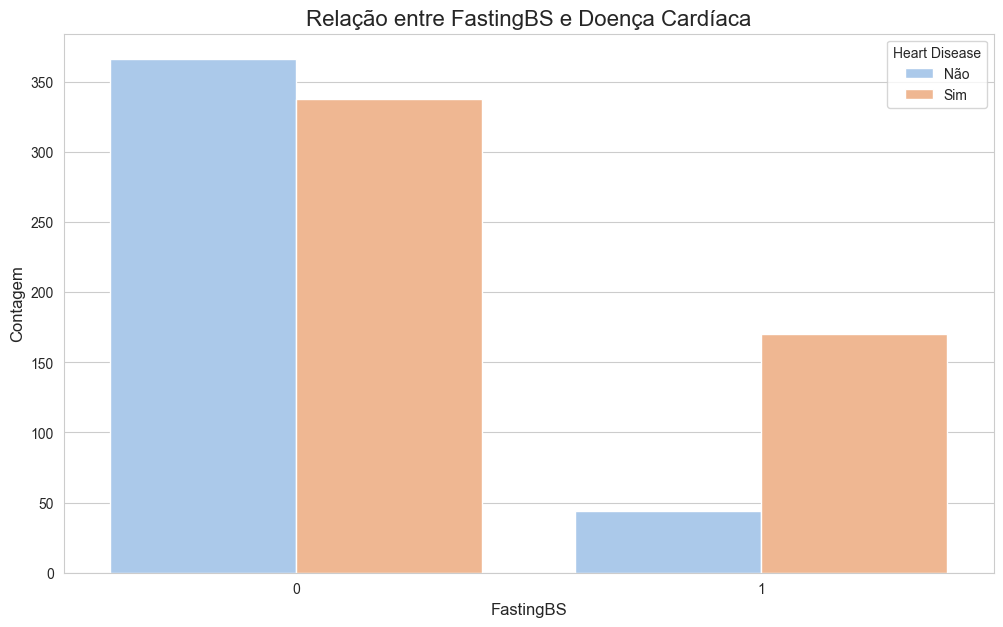

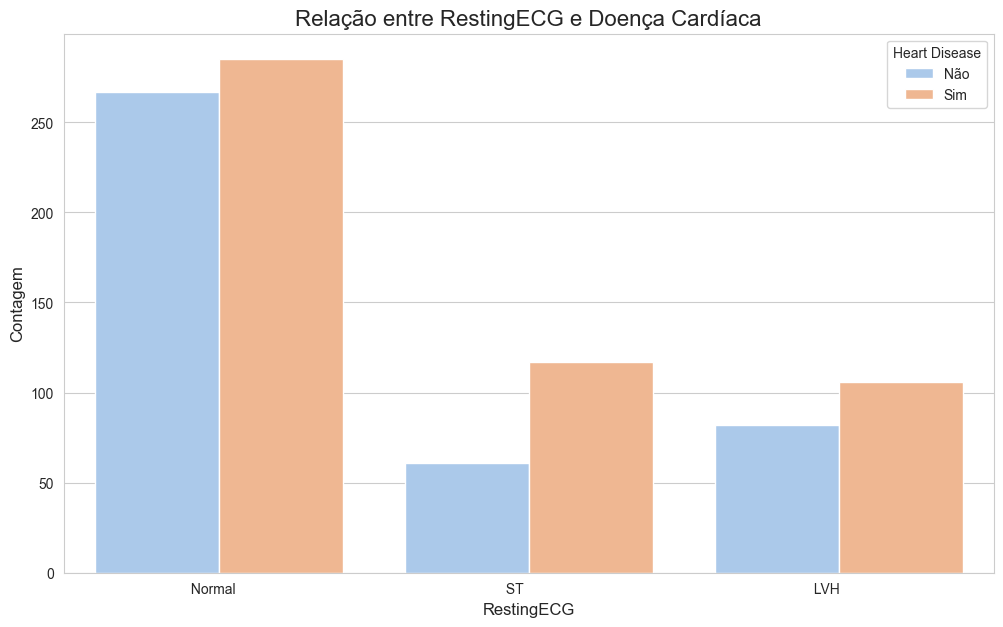

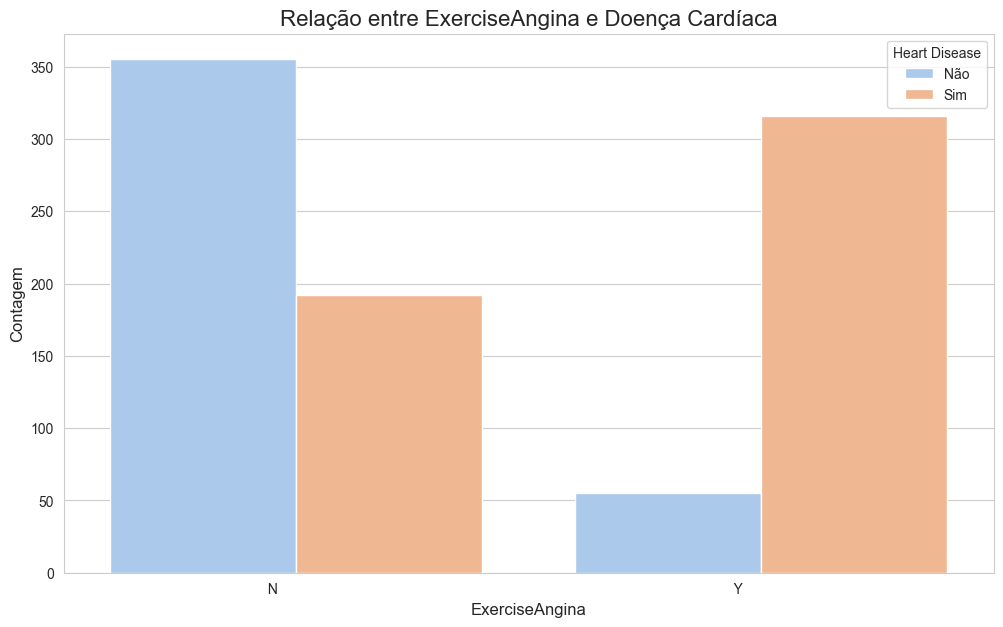

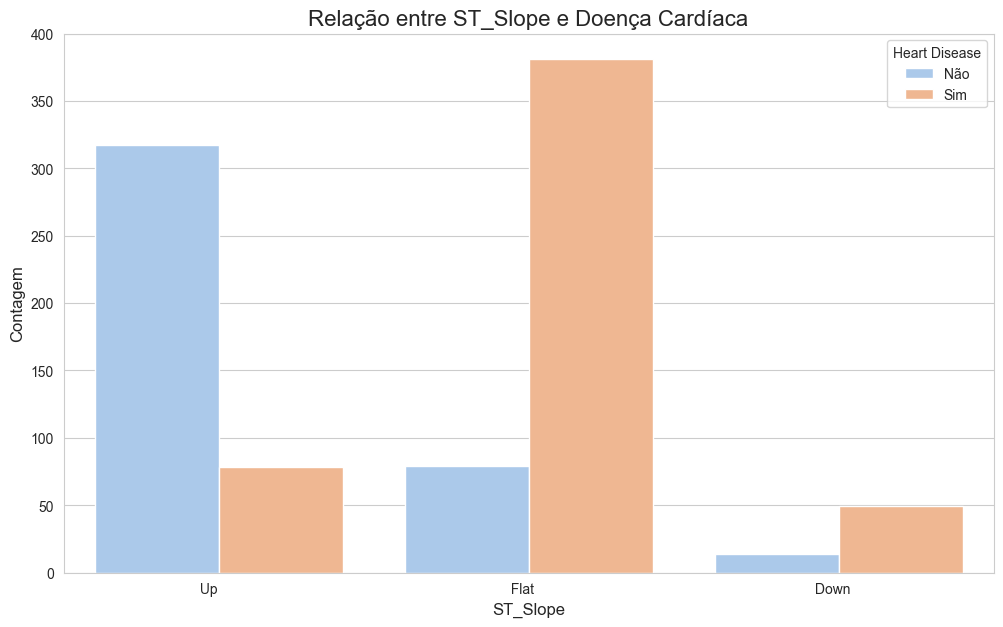


--- Análise: Features Numéricas vs. HeartDisease ---

Usando Boxplots para comparar as distribuições.



/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/201419547.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data_to_plot, palette='pastel')


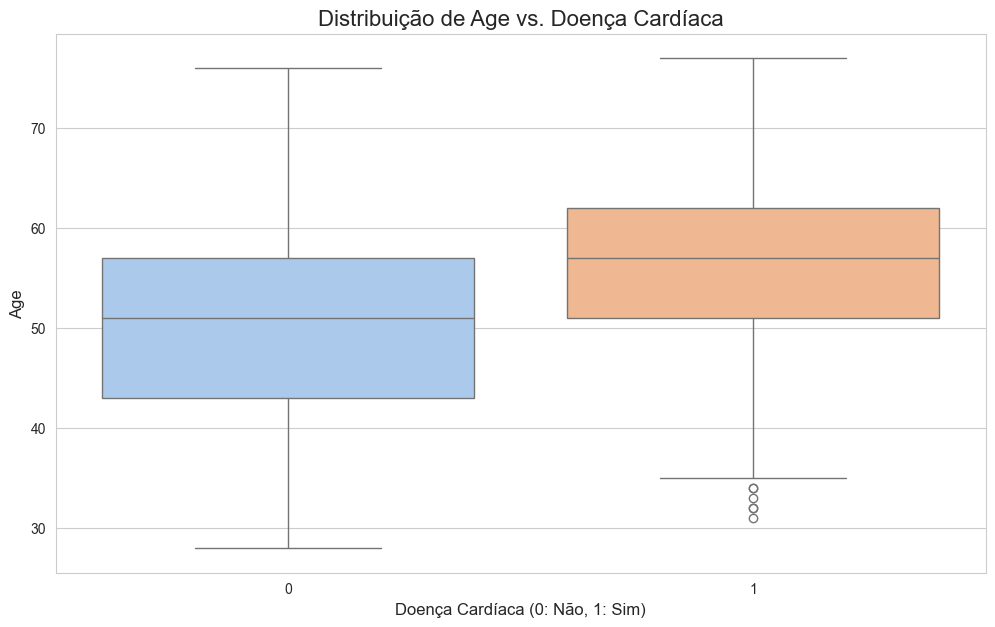

/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/201419547.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data_to_plot, palette='pastel')


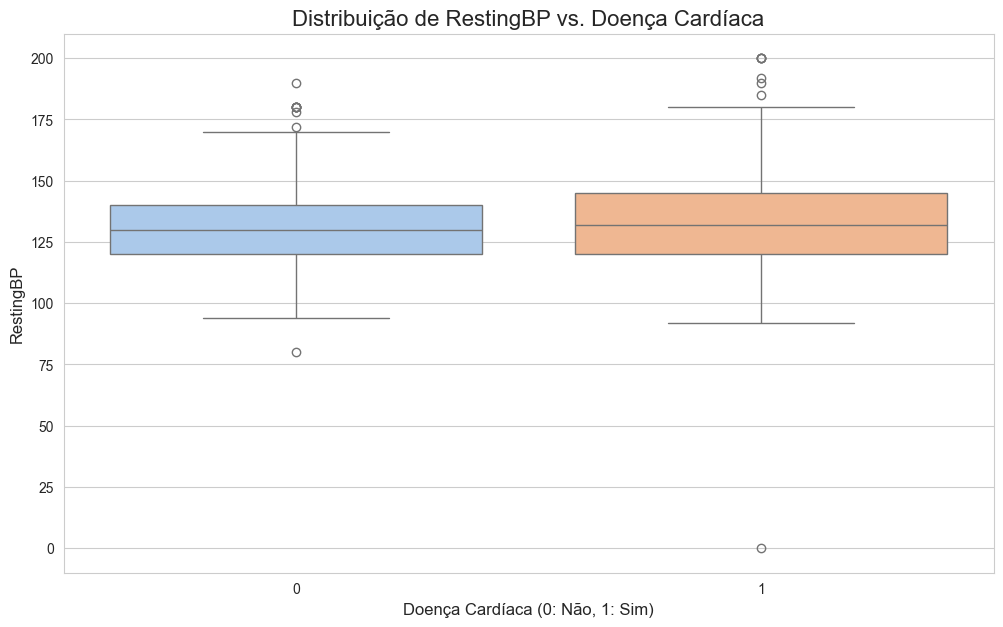

/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/201419547.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data_to_plot, palette='pastel')


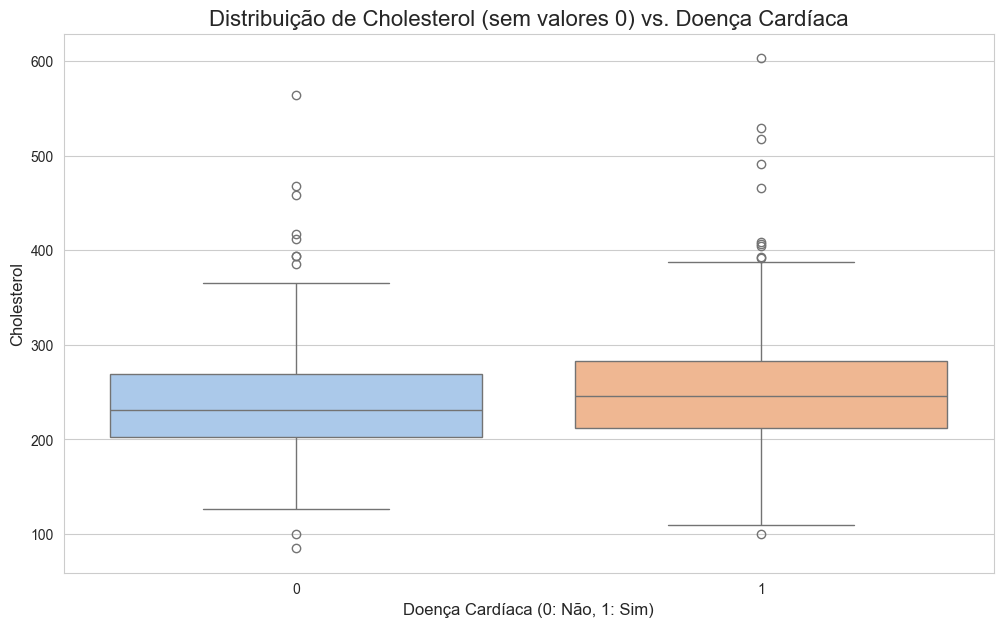

/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/201419547.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data_to_plot, palette='pastel')


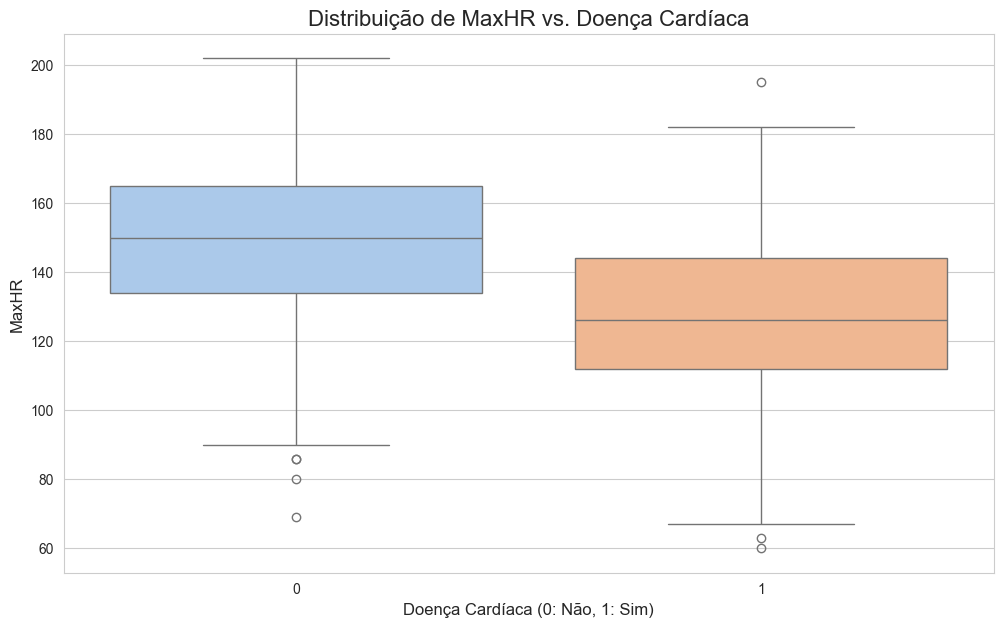

/var/folders/5w/bzm4289s5vv9_pbckhvlbpp80000gq/T/ipykernel_22608/201419547.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data_to_plot, palette='pastel')


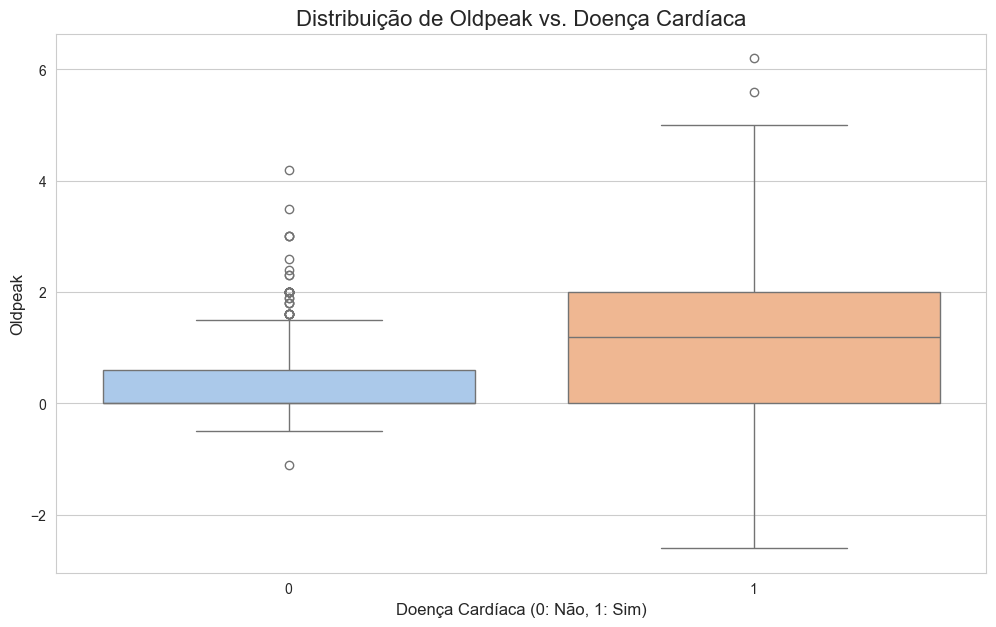


### Análise Bivariada Concluída ###


In [16]:
# ------------------------------------------------------------------------------
# 6.1. Features Categóricas vs. HeartDisease
# ------------------------------------------------------------------------------
print("\n--- Análise: Features Categóricas vs. HeartDisease ---\n")

# Lista de features categóricas (excluindo a variável alvo)
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop para criar um gráfico para cada feature categórica
for col in categorical_features:
    plt.figure() # Cria uma nova figura para cada gráfico
    sns.countplot(x=col, hue='HeartDisease', data=df_heart, palette='pastel')
    plt.title(f'Relação entre {col} e Doença Cardíaca', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.legend(title='Heart Disease', labels=['Não', 'Sim'])
    plt.show()

# ------------------------------------------------------------------------------
# 6.2. Features Numéricas vs. HeartDisease
# ------------------------------------------------------------------------------
print("\n--- Análise: Features Numéricas vs. HeartDisease ---\n")
print("Usando Boxplots para comparar as distribuições.\n")


# Lista de features numéricas
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop para criar um boxplot para cada feature numérica
for col in numerical_features:
    # Ignorar os valores 0 de colesterol para uma visualização mais limpa
    if col == 'Cholesterol':
        data_to_plot = df_heart[df_heart['Cholesterol'] != 0]
        title = f'Distribuição de {col} (sem valores 0) vs. Doença Cardíaca'
    else:
        data_to_plot = df_heart
        title = f'Distribuição de {col} vs. Doença Cardíaca'

    plt.figure()
    sns.boxplot(x='HeartDisease', y=col, data=data_to_plot, palette='pastel')
    plt.title(title, fontsize=16)
    plt.xlabel('Doença Cardíaca (0: Não, 1: Sim)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

print("\n### Análise Bivariada Concluída ###")

### Setup inicial concluído. Gerando gráficos de densidade... ###


--- Análise: Features Numéricas vs. HeartDisease ---

Usando Gráficos de Densidade (KDE) para comparar as distribuições.



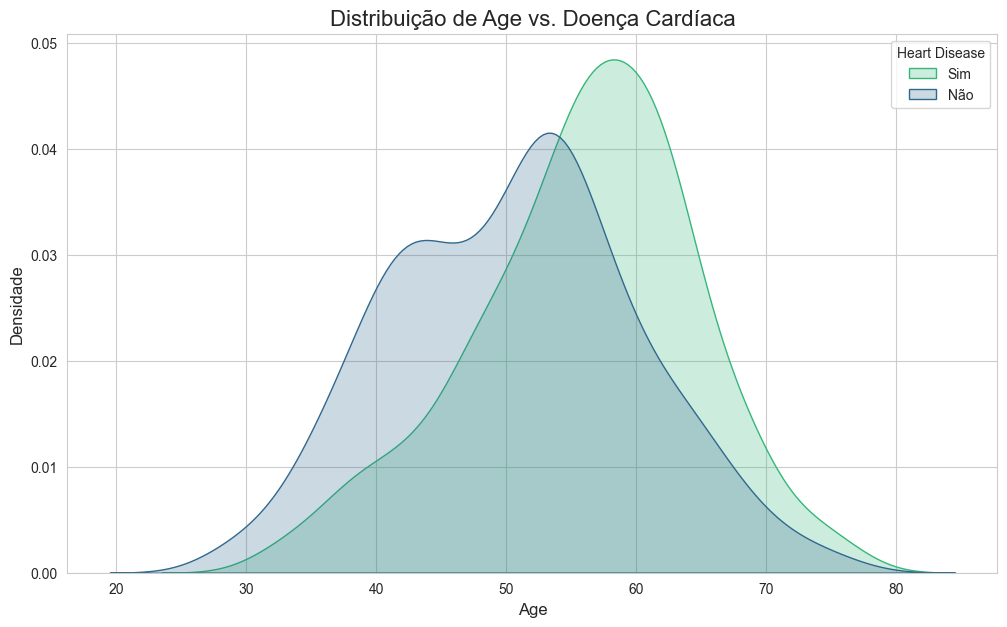

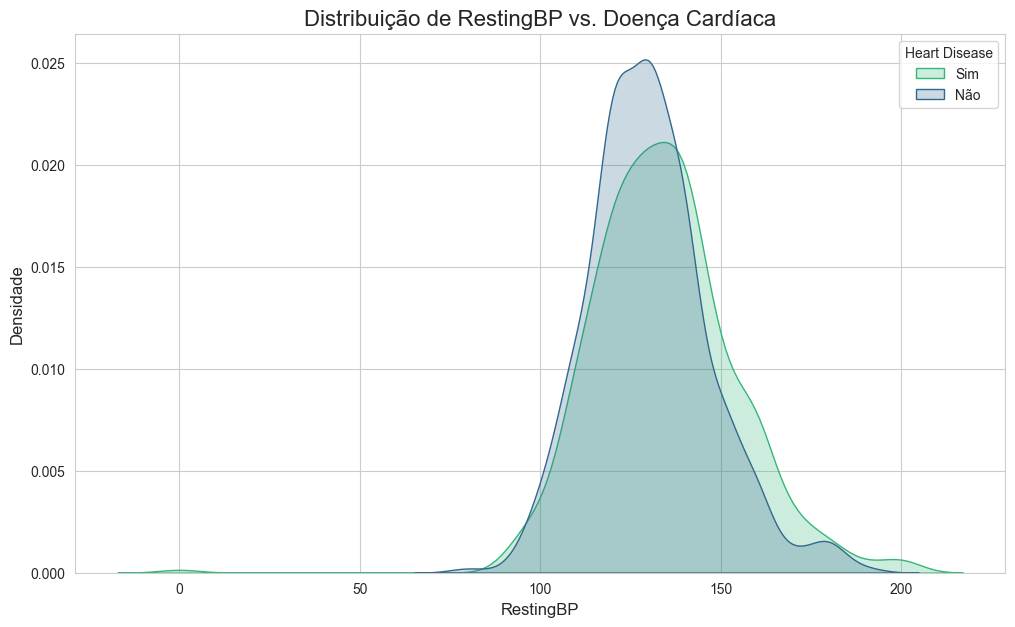

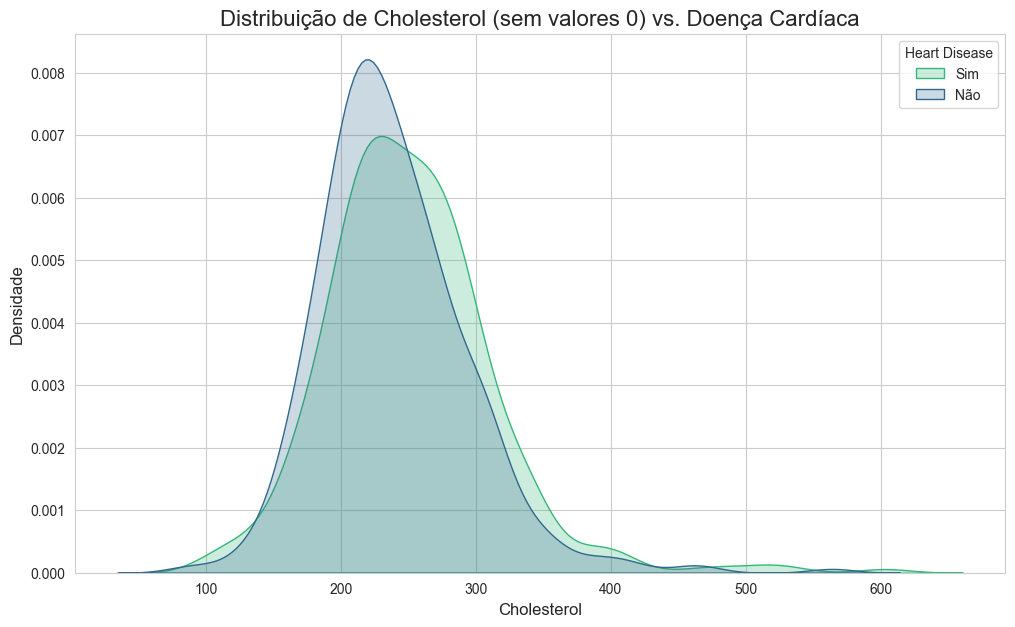

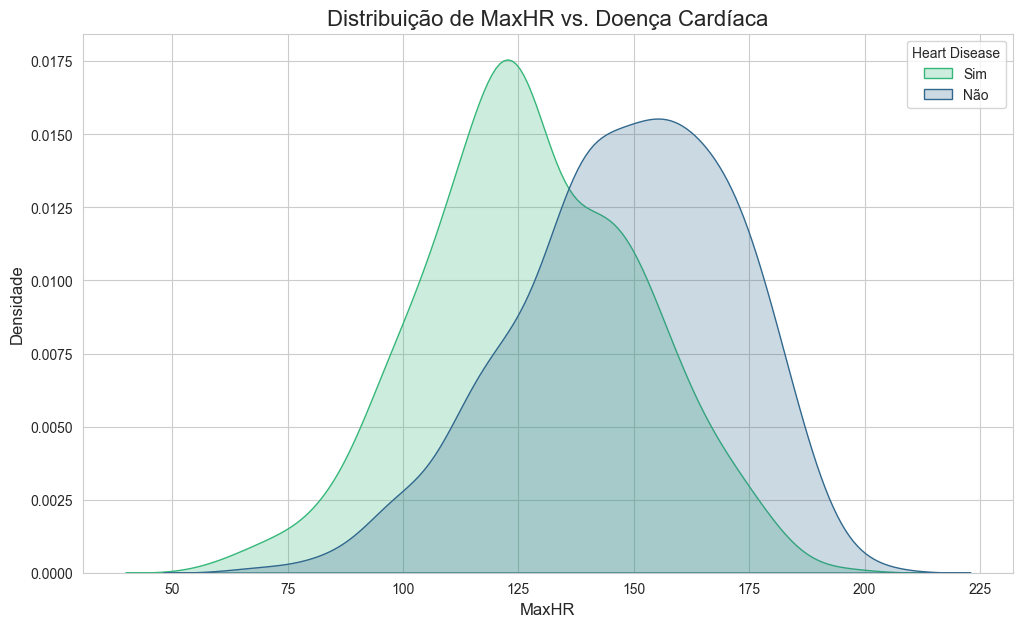

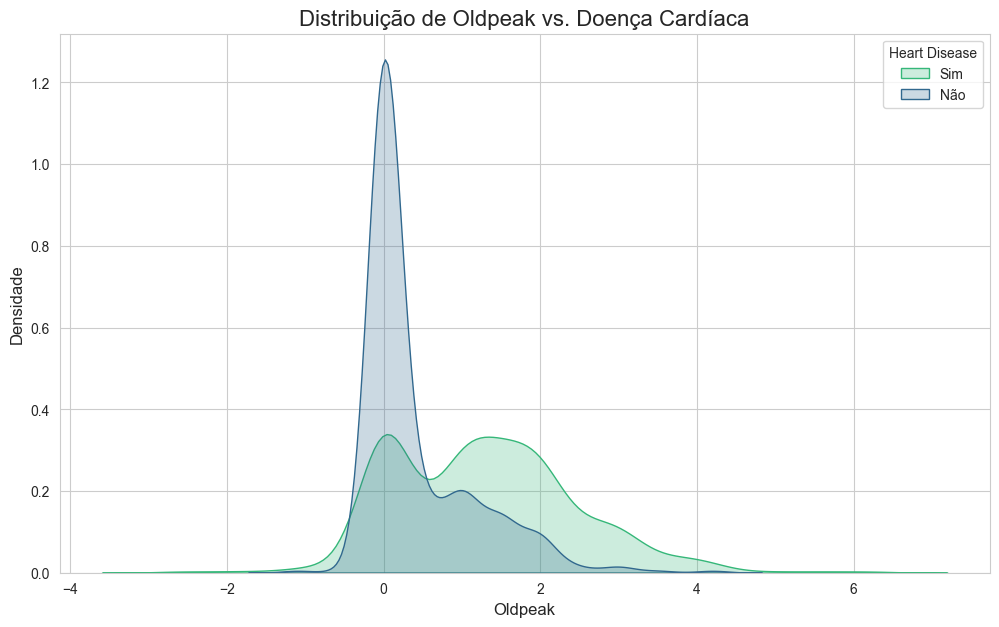


### Análise com Gráficos de Densidade Concluída ###


In [ ]:
# ==============================================================================
# ETAPA 6.3 (VISUALIZAÇÃO ALTERNATIVA):
# Análise Bivariada de Features Numéricas com Gráficos de Densidade (KDE)
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. Setup Inicial (Importação, Carregamento e Limpeza)
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

# Carregar e preparar os dados
df_heart = pd.read_csv('heart.csv')
df_heart.columns = df_heart.columns.str.strip()

print("### Setup inicial concluído. Gerando gráficos de densidade... ###\n")


# ------------------------------------------------------------------------------
# 6.3. Features Numéricas vs. HeartDisease (com KDE Plots)
# ------------------------------------------------------------------------------
print("\n--- Análise: Features Numéricas vs. HeartDisease ---\n")
print("Usando Gráficos de Densidade (KDE) para comparar as distribuições.\n")


# Lista de features numéricas
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop para criar um KDE plot para cada feature numérica
for col in numerical_features:
    # Ignorar os valores 0 de colesterol para uma visualização mais realista
    if col == 'Cholesterol':
        data_to_plot = df_heart[df_heart['Cholesterol'] != 0]
        title = f'Distribuição de {col} (sem valores 0) vs. Doença Cardíaca'
    else:
        data_to_plot = df_heart
        title = f'Distribuição de {col} vs. Doença Cardíaca'

    plt.figure()
    # O parâmetro 'hue' cria uma curva para cada categoria de 'HeartDisease'
    # 'fill=True' preenche a área sob a curva para melhor visualização
    sns.kdeplot(data=data_to_plot, x=col, hue='HeartDisease', fill=True, palette='viridis', common_norm=False)
    
    plt.title(title, fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densidade', fontsize=12)
    plt.legend(title='Heart Disease', labels=['Sim', 'Não']) # Ajuste a legenda conforme necessário
    plt.show()

print("\n### Análise com Gráficos de Densidade Concluída ###")